# Finding the Main Factors Affecting Teen Birth Rate
This project looks at various socio-economic and political data to find factors that strongly correlate with increases in teen birth rate. I aggregated, cleaned, and analyzed data factors related to:
- religion
- education
- politics 
- state GDP
- population density
- public school funding
- poverty rate and median income
- abortion rates for teens and overall
- sexual education approaches
- race

### Key Questions Explored:
- Which of the studied variables significantly correlate with teen birth rate?
- Which factor(s) most strongly affect teen birth rate?

### Techniques used:
- pandas for data cleaning
- matplotlib for data visualization
- scikitlearn for linear regression (with regularization)
- statsmodel for summary statistics
- plotly for interactive maps (see end)

### Key Findings:
- Religiosity, poverty rate, population density, and political leanings in each state appears to have the strongest effect on teen birth rate. Secondary factors may include education level of the population and median income.


- Link to plot with final correlation coefficients: https://github.com/mborysiak/Factors-Affecting-Teen-Pregnancy-Rate/blob/master/teen%20birth%20rate.pdf


- Link to interactive map for teen birth rate: https://plot.ly/~mborysiak/20/teen-birth-rate/
- Link to interactive map for religion importance: https://plot.ly/~mborysiak/14/religiosity-by-state/
- Link to interactive map for poverty rate: https://plot.ly/~mborysiak/18/poverty-rate-by-state/
- Link to interactive map for population density: https://plot.ly/~mborysiak/16/population-density-by-state/
- Link to interactive map for political leanings: https://plot.ly/~mborysiak/22/democratic-vote-share-by-state/


### Data Sources:
- Teen birth rates: https://www.hhs.gov/ash/oah/adolescent-development/reproductive-health-and-teen-pregnancy/teen-pregnancy-and-childbearing/trends/index.html
- Religiosity by state: http://www.pewforum.org/religious-landscape-study/state/california/#importance-of-religion-by-state
- GDP by state: https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP#cite_note-2
- Election results: https://en.wikipedia.org/wiki/United_States_presidential_election
- Population, Land area: http://www.ipl.org/div/stateknow/popchart.html
- Public education spending: http://www.governing.com/gov-data/education-data/state-education-spending-per-pupil-data.html
- Poverty rate: https://en.wikipedia.org/wiki/List_of_U.S._states_by_poverty_rate
- Median income by state: https://en.wikipedia.org/wiki/List_of_U.S._states_by_income
- Abortion rate by state: http://www.kff.org/womens-health-policy/state-indicator/abortion-rate/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
- Abortion percentage by age: http://www.kff.org/womens-health-policy/state-indicator/distribution-of-abortions-by-age/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
- Sex Education by state: https://www.guttmacher.org/state-policy/explore/sex-and-hiv-education
- Overall Sex Education Score from Graphiq: https://graphiq-stories.graphiq.com/stories/23028/states-worst-sex-education
- Population breakdown by race: http://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

# Reading and understanding dataset
The data from the sources listed above were compiled into a single .csv file. The major factors to be studied are listed after the next cell. A brief rundown of non-descriptive columns:
- Rel-Importance = survey results for importance of religion
- Edu-Level = percent of state residents with certain education level
- 2010 to 2014 change / 2014 spend per student = state funding for public education
- "sex ed mandated" — "family communcation" = the laws and guidelines states follow for their sex ed programs (binary)
- Sex Ed score = an aggregated sexual education metric from Graphiq (see above in sources)
- White/Black/Hispanic/Asian = breakdown of state population by race

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats.stats import pearsonr

data = pd.read_csv('teen pregnancy rate v3.csv')

data=data[0:51]
data.head()

,State,Code,Teen birth rate (15-19 year olds),Rel-Very Important,Rel-Somewhat Important,Rel-Not too important,Rel-Not at all important,Rel-Sample Size,Edu-High School,Edu-Bachelors,...,importance of abstinence,Importance of Sex Only Within Marriage,Discuss Sexual Orientation,Negative Outcomes of Teen Sex,Family Communication,Sex Ed Score,White,Black,Hispanic,Asian
0,Alabama,AL,32.0,77%,13%,6%,4%,511,84.30%,23.50%,...,stress,X,negative,X,NaN,18.35,0.65,0.27,0.04,0.04
1,Alaska,AK,27.8,41%,29%,13%,16%,310,92.10%,28.00%,...,na,na,na,na,na,3.53,0.58,0.03,0.06,0.07
2,Arizona,AZ,29.9,51%,24%,13%,11%,653,86.00%,27.50%,...,stress,NaN,NaN,X,NaN,0.18,0.51,0.04,0.37,0.03
3,Arkansas,AR,39.5,70%,16%,7%,5%,311,84.80%,21.10%,...,stress,X,NaN,NaN,NaN,42.21,0.74,0.15,0.07,0.02
4,California,CA,21.1,47%,26%,13%,14%,"3,697",81.80%,31.40%,...,cover,NaN,inclusive,NaN,X,25.28,0.39,0.06,0.38,0.15


# Data Cleaning
A number of the columns have missing values as shown in the following cell. Further, many of the values in these columns are nominal and will need to be converted to numeric or boolean. Missing values and nominal data conversion are shown below.

In [2]:
data.isnull().sum()[data.isnull().sum() > 0]

sex ed mandated                           21
HIV ed mandated                           11
must be medically accurate                33
must be age appropriate                   19
must be unbiased                          38
cannot promote religion                   44
must discuss contraception                23
importance of abstinence                   5
Importance of Sex Only Within Marriage    23
Discuss Sexual Orientation                30
Negative Outcomes of Teen Sex             28
Family Communication                      32
dtype: int64

The following cell shows a sample of the columns with missing and nominal data. 
- 'X' values mean the state DOES follow the respective guideline
- 'NaN' cells mean the state DOES NOT follow the guideline 
- 'na' cells show data was not available
- 'stress' and 'cover' indicate how much schools emphasize a respective topic.  

In [3]:
data.loc[:5,'sex ed mandated':'Family Communication']

,sex ed mandated,HIV ed mandated,must be medically accurate,must be age appropriate,must be unbiased,cannot promote religion,must discuss contraception,importance of abstinence,Importance of Sex Only Within Marriage,Discuss Sexual Orientation,Negative Outcomes of Teen Sex,Family Communication
0,NaN,X,NaN,X,NaN,NaN,X,stress,X,negative,X,NaN
1,na,na,na,na,na,na,na,na,na,na,na,na
2,NaN,NaN,NaN,X,NaN,NaN,NaN,stress,NaN,NaN,X,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stress,X,NaN,NaN,NaN
4,X,X,X,X,X,X,X,cover,NaN,inclusive,NaN,X
5,NaN,NaN,X,X,X,NaN,X,cover,NaN,inclusive,NaN,X


### Using a dictionary to map values
All of the cells with missing data or nominal values will be changed into numeric values according to the mapping scheme below.
- "X" values that indicate schools follow the guideline will be converted to 1.
- NaN values that indicate schools do NOT follow the guidline will be converted to 0.
- Topics that are stressed, covered, and inclusive will be given 2, 1, and 1 values respectively.
- Topics that are covered negatively will be given a -1 value.

The only remaining cells to fill in will be the "na" cells, which are not available. These will be filled by using the mean of each columns' values following mapping.

In [4]:
yes_no = {
    'X': 1,
    float('nan'): 0,
    'stress': 2,
    'cover': 1,
    'negative': -1,
    'inclusive': 1
}

for col in data.loc[:5,'sex ed mandated':'Family Communication'].columns:
    data[col] = data[col].map(yes_no)
    
data = data.fillna(data.mean()).round(2)
data.loc[:10,'sex ed mandated':'Family Communication']

,sex ed mandated,HIV ed mandated,must be medically accurate,must be age appropriate,must be unbiased,cannot promote religion,must discuss contraception,importance of abstinence,Importance of Sex Only Within Marriage,Discuss Sexual Orientation,Negative Outcomes of Teen Sex,Family Communication
0,0.00,1.00,0.00,1.00,0.00,0.00,1.00,2.00,1.00,-1.00,1.00,0.00
1,0.54,0.76,0.28,0.59,0.17,0.04,0.45,1.48,0.45,0.19,0.33,0.24
2,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00
4,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00
5,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00
6,0.00,1.00,0.00,0.00,0.00,0.00,0.45,1.48,0.45,0.19,0.33,0.24
7,1.00,1.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,1.00,0.00,0.00
8,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,1.00,0.00,1.00,0.00


All null values have been removed, as shown in the cell below. The next step will be to remove any special characters so that all columns can be converted to float for downstream analysis.

In [5]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

### Removing special characters and converting to float
All strings containing special symbols including dollar signs, percent symbols, etc. will be removed and values converted to float.

In [6]:
import re

def column_clean(col):
    cleaned_col = float(re.sub('[$%,]', '', str(col)))
    return cleaned_col

In [7]:
numeric_data = data.iloc[:,2:]
numeric_col = numeric_data.columns

for col in numeric_col:
    data[col] = data[col].apply(column_clean)

### Cleaned dataset
The entire dataset has been cleaned, including addressing null values, nominal columns, and converting all numeric data to float. The final change will be to convert the teen birth rate into a percentage. Currently, the teen birth rate is listed as number of births per 1000 adolescent females aged 15-19. I will divide this column by 10 to convert it to a percentage, e.g. instead of 24 births per 1000 females aged 15-19, it will be 2.4% of females aged 15-19.

In [8]:
# converting the target into percentage instead of rate per 1000
data['Teen birth rate (15-19 year olds)'] = data['Teen birth rate (15-19 year olds)'] / 10

In [9]:
data.dtypes

State                                      object
Code                                       object
Teen birth rate (15-19 year olds)         float64
Rel-Very Important                        float64
Rel-Somewhat Important                    float64
Rel-Not too important                     float64
Rel-Not at all important                  float64
Rel-Sample Size                           float64
Edu-High School                           float64
Edu-Bachelors                             float64
Edu-Advanced                              float64
Clinton vote %                            float64
Trump vote %                              float64
Gary Johnson vote %                       float64
Jill Stein vote %                         float64
Obama vote %-12                           float64
Romney vote %-12                          float64
Gary Johnson vote %-12                    float64
Jill Stein vote %-12                      float64
Obama vote % 08                           float64


# Plotting all factors vs. teen birth rate to explore correlations

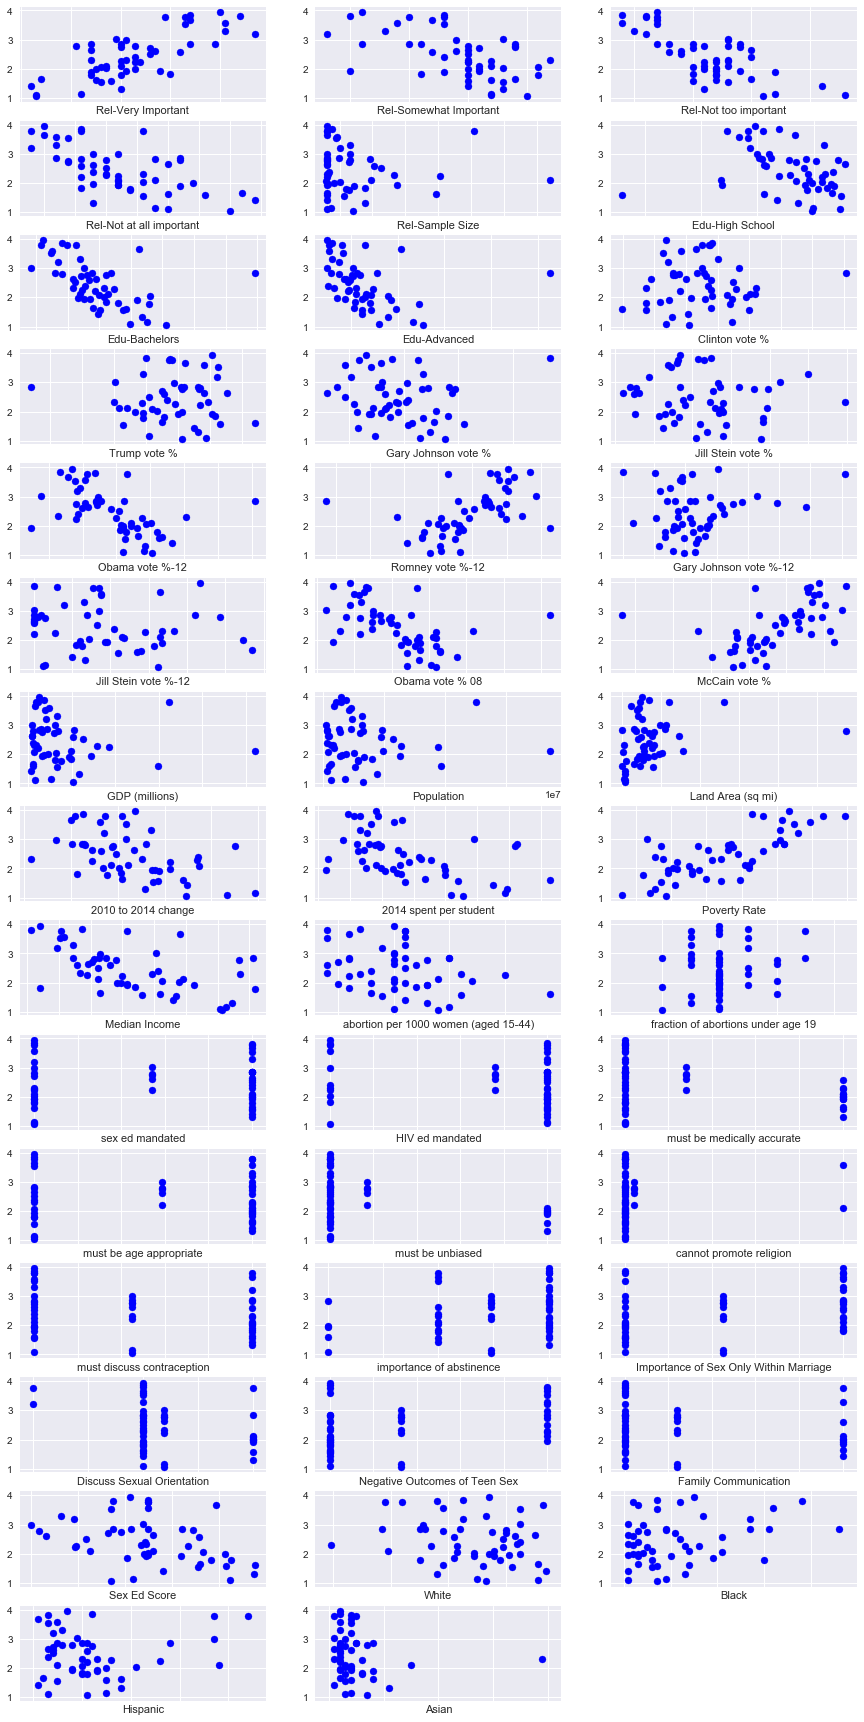

In [10]:
fig = plt.figure(figsize=(15, 90))
corr_coeff_p_val = []

data_col = data.columns
data_col_plot = data_col[3:]

for i in range(0,len(data_col_plot)):
    ax = fig.add_subplot(len(data_col_plot)-1/3,3,i+1)
    ax.scatter(data[data_col_plot[i]], data['Teen birth rate (15-19 year olds)'], c='blue')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(data_col_plot[i])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
plt.show()

# Summary of Correlations
A number of strong correlations do appear, particularly for the continuous variables. For the binary variables from sex education, some trends do appear but are more difficult to visualize. A rough summary of higher correlations:
- religion importance
- education level
- obama/mccain/romney vote levels, though note 2016 election results show little correlation
- money spent per student on education
- poverty rate
- median income
- abortion rate
- sex ed that is medically accurate
- sex ed that must be unbiased
- sex ed that discusses negative outcomes of teen sex


### Visualizing Correlations Using Heatmaps
The heatmap below provides another view of correlations. The amount of data is a bit overwhelming, but a few important notes to take into account downstream include:

- Religiosity rankings correlate strongly with teen birth rate and are also exhibit positive and negative multicollinearity with eachother depending on the sentiment (e.g. very important vs. not at all important)
- The Obama and McCain / Romney vote shares moderately correlate with the target and are inversely related
- Poverty rate and Median income strongly correlate with the target and are inversely related
- Education metrics correlate with Obama / McCain / Romney vote shares.

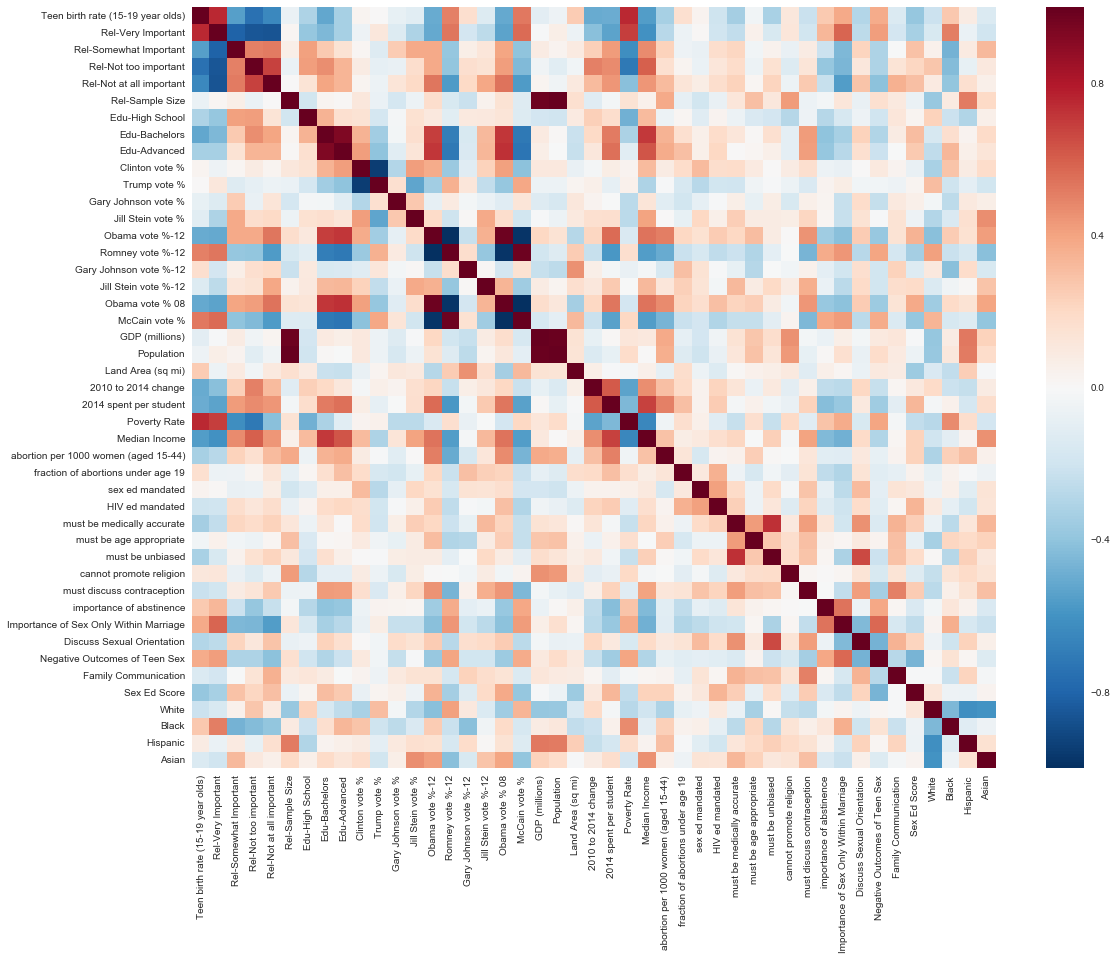

In [11]:
plt.figure(figsize=(18,14))
corrmat = data.corr()
sns.heatmap(corrmat)

# Creating new factors with data—GDP per capita, Population Density, and Teen abortion rate
A few of our variables can be combined to make more meaningful statistics, such as combining GDP and population to make per capita GDP, combining population and land area for population density, and combining the fraction of teen abortions with the overall abortion rate to get the abortions from teens specifically. 

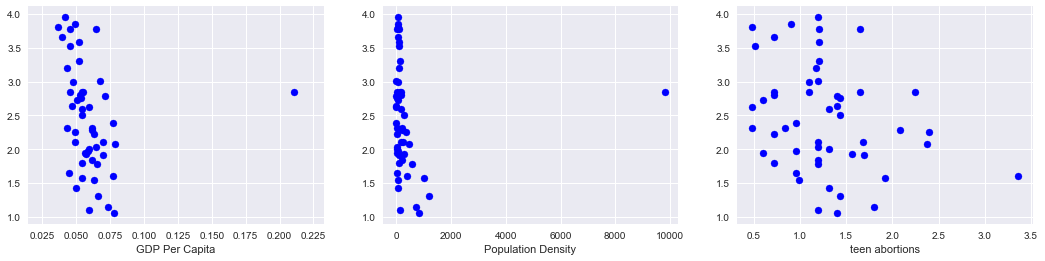

In [12]:
data['GDP Per Capita'] = data['GDP (millions)'] / data['Population']
data['Population Density'] = data['Population'] / data['Land Area (sq mi)']
data['teen abortions per 1000'] = data['abortion per 1000 women (aged 15-44)'] * data['fraction of abortions under age 19']

fig = plt.figure(figsize=(18,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.scatter(data['GDP Per Capita'], data['Teen birth rate (15-19 year olds)'], c='blue')
ax1.set_xlabel('GDP Per Capita')
ax2.scatter(data['Population Density'], data['Teen birth rate (15-19 year olds)'], c='blue')
ax2.set_xlabel('Population Density')
ax3.scatter(data['teen abortions per 1000'], data['Teen birth rate (15-19 year olds)'], c='blue')
ax3.set_xlabel('teen abortions')

plt.show()

### Removing Washington DC as an outlier
Washington DC appears to be a large outlier in the previous plots. It will be removed from the analysis to prevent skewing data, as well as because it's unique in that it is not a state directly.

In [13]:
no_DC = data.drop([8])
no_DC = no_DC.reset_index(drop=True)

### GDP per capita and Population Density correlations with Teen Birth rate without Washington DC

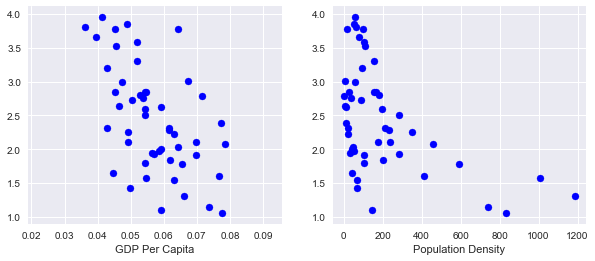

In [14]:
no_DC['GDP Per Capita'] = no_DC['GDP (millions)'] / no_DC['Population']
no_DC['Population Density'] = no_DC['Population'] / no_DC['Land Area (sq mi)']

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2
                     )
ax1.scatter(no_DC['GDP Per Capita'], no_DC['Teen birth rate (15-19 year olds)'], c='blue')
ax1.set_xlabel('GDP Per Capita')
ax2.scatter(no_DC['Population Density'], no_DC['Teen birth rate (15-19 year olds)'], c='blue')
ax2.set_xlabel('Population Density')

plt.show()

# Filtering out data columns with correlation p-values > 0.05
Because the data only has 50 samples (50 states), I will need to remove some of the factors to increase the degrees of freedom and prevent over-fitting when performing linear regression. I will remove any variable that does not have a significant correlation with teen birth rate (p-value = 0.05). Any variable without a significant correlation is less likely to be predictive when creating the linear regression model.

The list below shows all the variables that have significant correlations to teen birth rate. All of the variables will initially be input into the linear regression model.

In [15]:
numeric_data_columns = no_DC.select_dtypes(include=['float'])

for col in numeric_data_columns:
        corr = pearsonr(no_DC[col], no_DC['Teen birth rate (15-19 year olds)'])
        if corr[1] > 0.05:
            del no_DC[col]

data_model = no_DC
pd.Series(data_model.columns)

0                                      State
1                                       Code
2          Teen birth rate (15-19 year olds)
3                         Rel-Very Important
4                     Rel-Somewhat Important
5                      Rel-Not too important
6                   Rel-Not at all important
7                            Edu-High School
8                              Edu-Bachelors
9                               Edu-Advanced
10                           Obama vote %-12
11                          Romney vote %-12
12                           Obama vote % 08
13                             McCain vote %
14                       2010 to 2014 change
15                    2014 spent per student
16                              Poverty Rate
17                             Median Income
18      abortion per 1000 women (aged 15-44)
19                must be medically accurate
20                          must be unbiased
21                  importance of abstinence
22    Impo

# Running linear regression on significant factors
The response variable will be the teen birth rate for each state. Each factor will be normalized to between 0 and 1, which will make it easier to interpret regression coefficients and their effect on the teen pregnancy rate. 

Also note that I will not be using train / test splits in this work due to the small sample size (n=50) that is restricted by the number of states. However, I will consistently keep the bias / variance tradeoff in mind and use regularization when needed.

In [16]:
from sklearn.linear_model import LinearRegression

y = data_model['Teen birth rate (15-19 year olds)']
X = data_model.select_dtypes(include=['float']).drop('Teen birth rate (15-19 year olds)', axis=1)
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm, y) 
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm, y)
print('R^2: ', r_squared)

R^2:  0.94860030188


# Visualizing regression coefficients

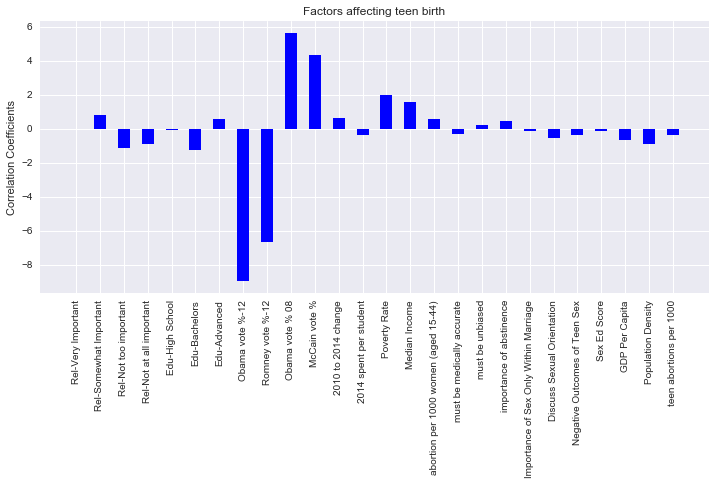

In [17]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen birth')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Results from initial regression
The plot of regression coefficients above shows that the model likely has high variance and is being overfit due to the high number of variables compared to samples. The R^2 value was 0.95, but a few factors are being amplified, showing close 100% change in teen birth rate, as well as non-sensical results. For example, we know the Obama and Romney vote share are inversely related from the heatmap shown previously, yet their regression coefficients have the same directionality in this model. The next model will use regularization to suppress overfitting. 

# Linear Regression with Ridge Regularization 

In [18]:
from sklearn.linear_model import Ridge

Y = data_model.iloc[:,2]
X = data_model.iloc[:,3:]
X_norm = (X - X.min()) / (X.max() - X.min())

clf = Ridge(alpha=1)
mdl = clf.fit(X_norm,Y) 
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm, Y)
print('R^2', r_squared)

R^2 0.862383800795


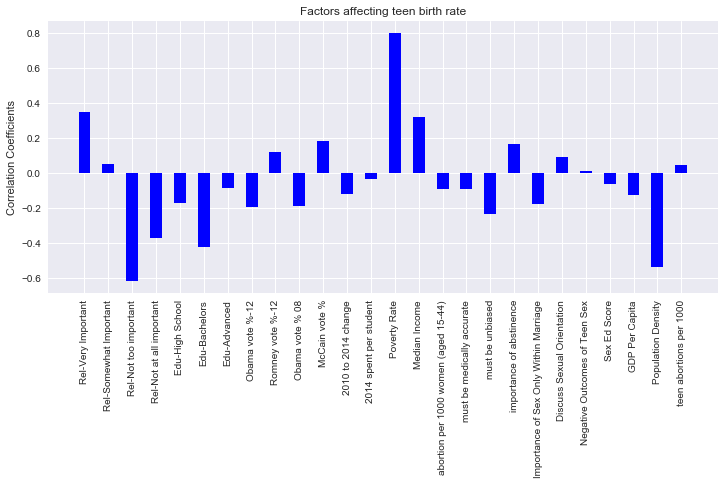

In [19]:
bar_position = range(8)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen birth rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Summary of regularized model
The regularized model shows much more reasonable results with an R^2 of 0.86. All variables contribute smaller percent changes in the birth rate, with religion, education, poverty rate, and population density looking particularly important. As I mentioned during the summary of the heatmap above, there are numerous religious, educational, and political factors that are related to eachother. The heatmap below shows this in more detail now that some factors have been removed.

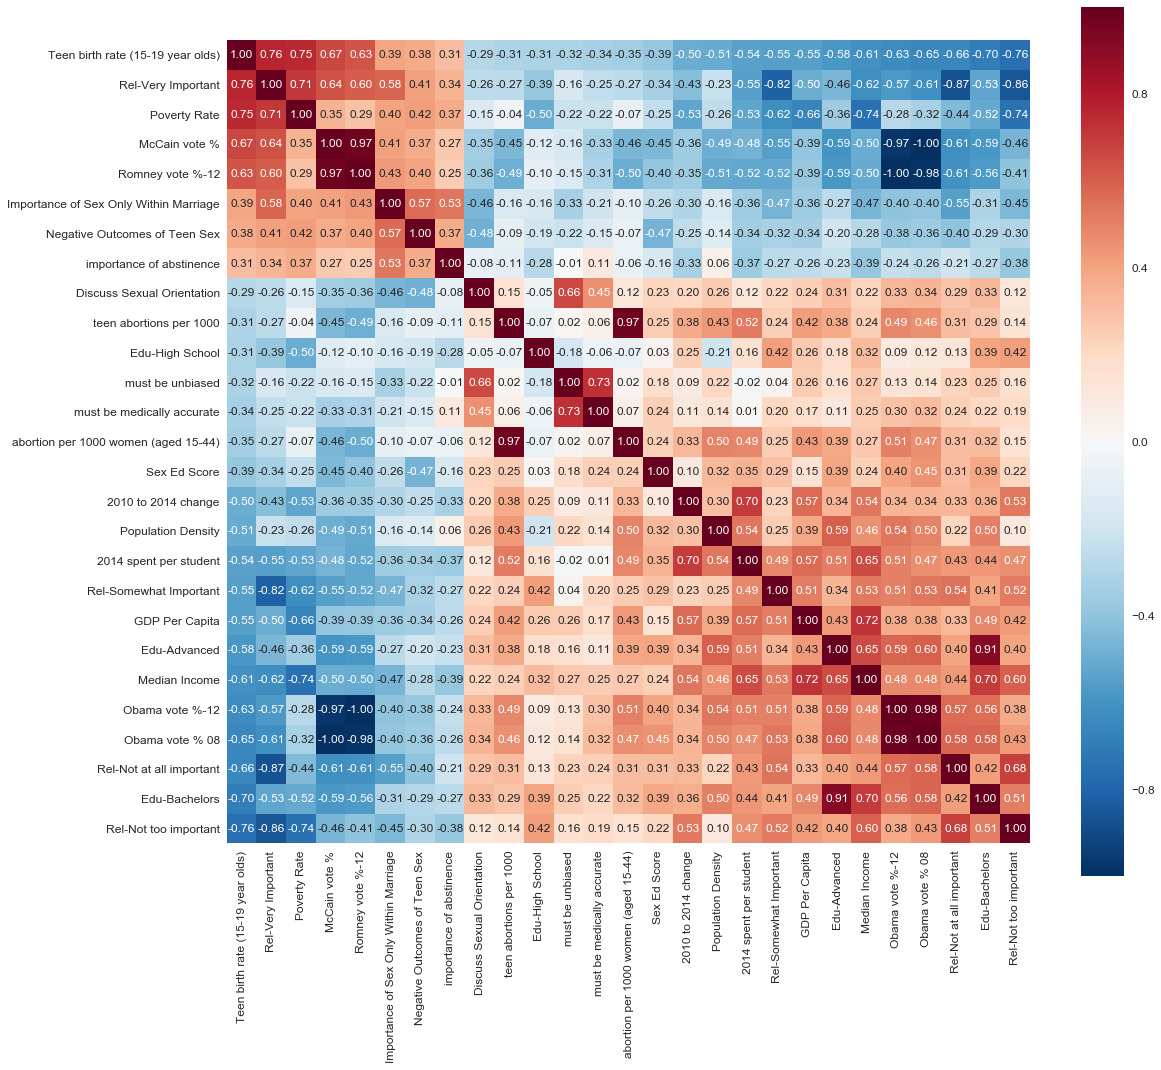

In [20]:
plt.figure(figsize=(18,16))
k = 30
corrmat = data_model.corr()
cols_large = corrmat.nlargest(k, 'Teen birth rate (15-19 year olds)').index
hm_large = corrmat.nlargest(k,'Teen birth rate (15-19 year olds)')[cols_large]
sns.set(font_scale=1.2)
sns.heatmap(hm_large, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12})

# Reducing model complexity and aggregating related factors
Due to the multicollinearity between related factors, I will create a single metric for some of these factors to further reduce the number of independent variables. 

I will create four combined variables for religion importance, political leanings, education level of the state population, and the focus of sexual education teachings, as follows:
- religion ratio = (religion very important + religion somewhat important) / (religion not too important + religion not at all important)
- political ratio = (Obama '12 share + Obama '08 share) - (Romney '12 share + McCain '08 share)
- education score = percent high school educated + percent bachelors educated + percent advanced degree educated
- sex ed focus = (abstinence focus + marriage sex only + negative outcomes of teen sex) / (unbiased teachings + medically accurate teaching)

While these metrics are arbitrary, they capture relationships between related variables so that their importance is not spread out among multiple variables. Reducing the number of variables should help improve the fit and show which variables are most important for predicting teen birth rate. 

In [21]:
religion_ratio = (data_model['Rel-Very Important'] + data_model['Rel-Somewhat Important']) / \
                 (data_model['Rel-Not too important'] + data_model['Rel-Not at all important'])

political_ratio = (data_model['Obama vote %-12'] + data_model['Obama vote % 08']) - \
                  (data_model['Romney vote %-12'] + data_model['McCain vote %'])

education_score = data_model['Edu-High School'] + data_model['Edu-Bachelors'] + data_model['Edu-Advanced']

sex_ed_focus = (data_model['importance of abstinence'] + \
                data_model['Importance of Sex Only Within Marriage'] + \
                data_model['Negative Outcomes of Teen Sex']) / ((data_model['must be unbiased']+1) + \
                                                             (data_model['must be medically accurate'])+1)

print('religion ratio: ', pearsonr(religion_ratio, no_DC['Teen birth rate (15-19 year olds)']))
print('political ratio: ', pearsonr(political_ratio, no_DC['Teen birth rate (15-19 year olds)']))
print('education score: ', pearsonr(education_score, no_DC['Teen birth rate (15-19 year olds)']))
print('sex ed focus: ', pearsonr(sex_ed_focus, no_DC['Teen birth rate (15-19 year olds)']))

religion ratio:  (0.77380235601466607, 4.428148442685096e-11)
political ratio:  (-0.64801939833565714, 3.6284600913832098e-07)
education score:  (-0.65923840274684387, 1.9318403220542328e-07)
sex ed focus:  (0.53875983762363611, 5.4303451654490648e-05)


### Summary of new metrics
All of the new metrics show reasonable correlation with our response variable, including signficant p-values.
- As religion importance increases, teen birth rate increases
- As states lean more democratic in voting, teen birth rate decreases
- As education of the population increases, teen birth rate decreases
- As sex ed focuses more on abstinence over medical or unbiased teachings, teen birth rate increases

### Adding new aggregated factors to dataset and removing old factors

In [22]:
data_model_reduced = data_model.drop(['Rel-Very Important', 'Rel-Somewhat Important',
                                  'Rel-Not too important', 'Rel-Not at all important',
                                  'Obama vote %-12', 'Obama vote % 08',
                                  'Romney vote %-12', 'McCain vote %',
                                  'Edu-High School','Edu-Bachelors', 'Edu-Advanced',
                                  'importance of abstinence', 'Importance of Sex Only Within Marriage',
                                  'Negative Outcomes of Teen Sex', 'must be unbiased', 
                                  'must be medically accurate'], axis=1)

data_model_reduced['religion_score'] = religion_ratio
data_model_reduced['political_score'] = political_ratio
data_model_reduced['education_score'] = education_score
data_model_reduced['sex_ed_score'] = sex_ed_focus
data_model_reduced.head()

,State,Code,Teen birth rate (15-19 year olds),2010 to 2014 change,2014 spent per student,Poverty Rate,Median Income,abortion per 1000 women (aged 15-44),Discuss Sexual Orientation,Sex Ed Score,GDP Per Capita,Population Density,teen abortions per 1000,religion_score,political_score,education_score,sex_ed_score
0,Alabama,AL,3.20,-6.4,9028.0,19.2,44765.0,9.0,-1.00,18.35,0.042860,94.193126,1.17,9.000000,-43.77,116.5,2.000000
1,Alaska,AK,2.78,7.5,18416.0,11.4,73355.0,10.0,0.19,3.53,0.071404,1.241768,1.40,2.413793,-35.52,130.2,0.922449
2,Arizona,AZ,2.99,-11.6,7528.0,18.2,51492.0,10.0,0.00,0.18,0.047395,56.250637,1.10,3.125000,-17.58,123.7,1.500000
3,Arkansas,AR,3.95,-3.1,9616.0,18.7,41995.0,10.0,0.00,42.21,0.041390,56.001930,1.20,7.166667,-43.55,113.4,1.500000
4,California,CA,2.11,-5.7,9595.0,16.4,64500.0,10.0,1.00,25.28,0.069863,238.869669,1.20,2.703704,47.18,124.8,0.250000


# Linear regression on new, reduced model

In [23]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.iloc[:,3:]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y) 
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm, Y)
print('R^2:', r_squared)

R^2: 0.870301966772


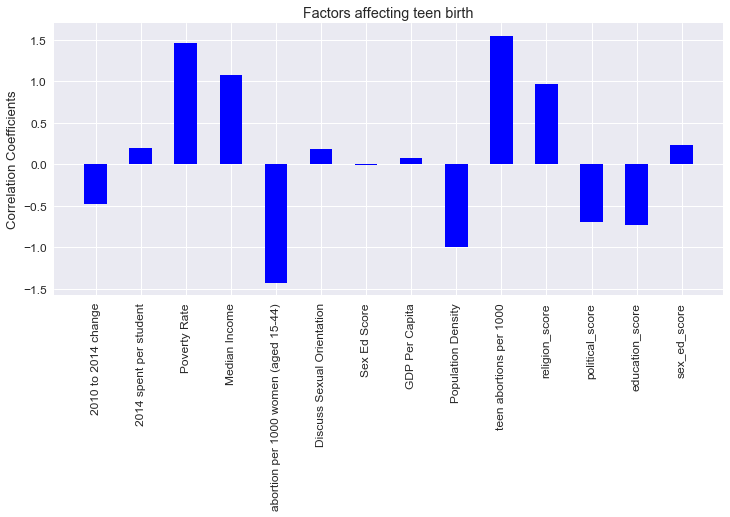

In [24]:
bar_position = range(8)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen birth')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Summary of regression on reduced model
Regression without regularization shows better results with the aggregated factors. Poverty rate, income, religion ratio, and education score look to be significant. Other factors that may play a role include teen abortion rate, population density, the political ratio, and sex ed focus. 

While the coefficient changes on the response are more reasonable than the initial fit without regularization the model may be still over-fitting due to the higher number of variables compared to samples and multicollinearity between some of the factors (e.g. Poverty rate and Median Income). I will re-fit with regularization again in order to reduce the risk of the model exhibiting high variance.

# Reduced model fit with regularization

In [25]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.iloc[:,3:]
X_norm = (X - X.min()) / (X.max() - X.min())

clf = Ridge(alpha=1)
mdl = clf.fit(X_norm,Y) 
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm, Y)
print('R^2', r_squared)

R^2 0.816670913814


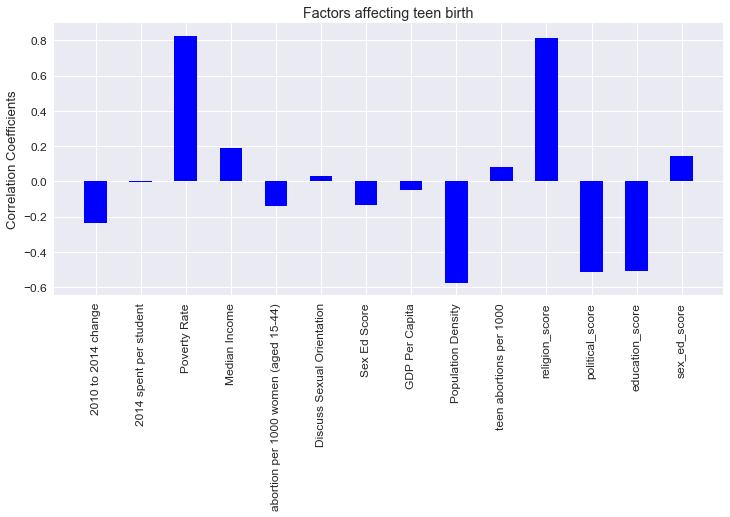

In [26]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen birth')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Reduced, regularized model results
I believe that the model is beginning to focus in on the most important factors. This model matches relatively well with the previous one in showing that poverty rate and religion score are the most dominant factors predicting teen birth. Other important factors appear to be population density, political score, and education score. At this point, I will focus my analysis on these 5 factors. Unfortunately the Ridge model doesn't show summary statistics to prove these are the significant factors, so this selection is done via visual inspection.

# Re-running linear regression with significant factors

In [27]:
data_model_reduced_2 = data_model_reduced[['Teen birth rate (15-19 year olds)', 'Poverty Rate',
                                           'Population Density', 'religion_score', 
                                           'political_score','education_score']]

Y = data_model_reduced_2['Teen birth rate (15-19 year olds)']
X = data_model_reduced_2.drop('Teen birth rate (15-19 year olds)', axis=1)
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
print('R^2: ', r_squared)

R^2:  0.818985542891


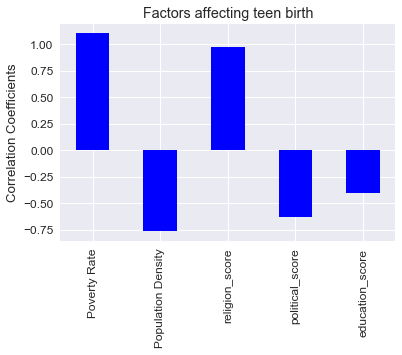

In [28]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen birth')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Summary of model results and OLS statistics
The model with the 5 factors above has an R^2 value of 0.82. The unregularized and regularized models with 14 factors had R^2 values of 0.87 and 0.82 respectively. Thus, I have reduced the explanatory variables by ~1/3, while still explaining a high fraction of the data variance. Further, by reducing the number of factors to 5, the risk for creating a model with high variance is signficantly reduced, while the model is still showing relatively low bias as demonstrated by a consistent R^2 value.

Now that the model is fit reasonably without regularization, the model statistics can be viewed using the ordinary least squares (OLS) model.

In [29]:
import statsmodels.api as sm

X2 = sm.add_constant(X_norm)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

/Users/Mark/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                                    OLS Regression Results                                   
Dep. Variable:     Teen birth rate (15-19 year olds)   R-squared:                       0.819
Model:                                           OLS   Adj. R-squared:                  0.798
Method:                                Least Squares   F-statistic:                     39.81
Date:                               Wed, 11 Oct 2017   Prob (F-statistic):           2.96e-15
Time:                                       09:13:42   Log-Likelihood:                -15.651
No. Observations:                                 50   AIC:                             43.30
Df Residuals:                                     44   BIC:                             54.77
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
                         coef    std err          t      P>|

### Summary statistics
Poverty rate and religion score again have the largest coefficients and are signficant. Population density also appears to be signficant, while education score is not significant. Political score is very close to being significant if using an alpha of 0.05. Because I believe the risk of overfitting is relatively low at this point, I will retain the political ratio and examine multicollinearity below.

# Exploring correlations between significant factors (religion, poverty, population density)

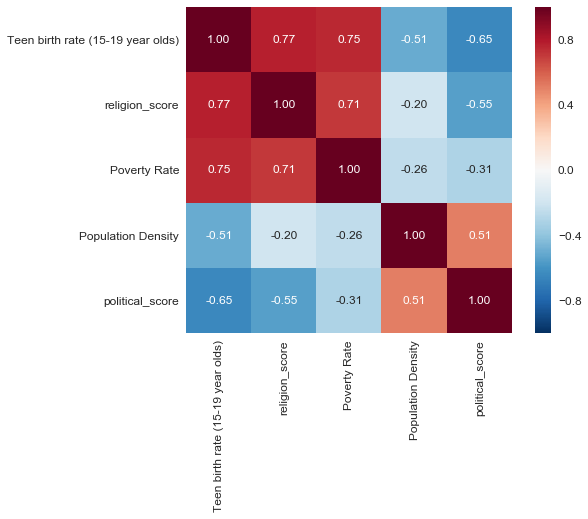

In [30]:
plt.figure(figsize=(8,6))

corrmat = data_model_reduced_2.corr()
k = 5
cols_large = corrmat.nlargest(k, 'Teen birth rate (15-19 year olds)').index
hm_large = corrmat.nlargest(k,'Teen birth rate (15-19 year olds)')[cols_large]
sns.set(font_scale=1.2)
sns.heatmap(hm_large, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12})

### Summary of correlations
Population density is not correlated significantly with either religion ratio or poverty rate, but has moderate correlation with the political score. Religion ratio and poverty rate are strongly correlated with eachother, and religion score correlates moderately with the political score

Below, I will remove each factor one-at-a-time to see the reduction in the R^2 score before creating a final model.

# Model with all 4 factors

In [31]:
Y = data_model_reduced_2['Teen birth rate (15-19 year olds)']
X = data_model_reduced_2[['Population Density', 'religion_score', 'Poverty Rate', 'political_score']]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m_final = mdl.coef_
b_final = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
print('intercept: ', b_final)
print('regression coefficients: ', m_final)
print('r^2: ', r_squared)

intercept:  2.02376173429
regression coefficients:  [-0.78871805  0.96094196  1.29321221 -0.78432655]
r^2:  0.810121141003


### Dropping religion rate from analysis

In [32]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.loc[:,['Population Density', 'Poverty Rate', 'political_score']]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
print('r^2: ', r_squared)

r^2:  0.775192166667


### Dropping poverty rate from the analysis

In [33]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.loc[:,['Population Density', 'religion_score', 'political_score']]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
print('r^2: ', r_squared)

r^2:  0.738700900923


### Dropping population density from the analysis

In [34]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.loc[:,['Poverty Rate', 'religion_score', 'political_score']]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
print('r^2: ', r_squared)

r^2:  0.777474372619


### Dropping political score from analysis

In [35]:
Y = data_model_reduced.iloc[:,2]
X = data_model_reduced.loc[:,['Poverty Rate', 'religion_score', 'Population Density']]
X_norm = (X - X.min()) / (X.max() - X.min())

mdl = LinearRegression().fit(X_norm,Y)
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm,Y)
print('r^2: ', r_squared)

r^2:  0.781936172198


# Summary of removing final variables
Removing any one of the final 4 variables drops the R^2 fit by between 0.03 and 0.07, meaning each of these is likely playing a signficant role in predicting teen birth. By including religion ratio, poverty rate, population density, and political score, the model achieves a 0.81 R^2 fit. Note that including the education score that was dropped as not significant, only improves the fit by .009. 

# Plot of final correlation coefficients to predict teen birth rate. 

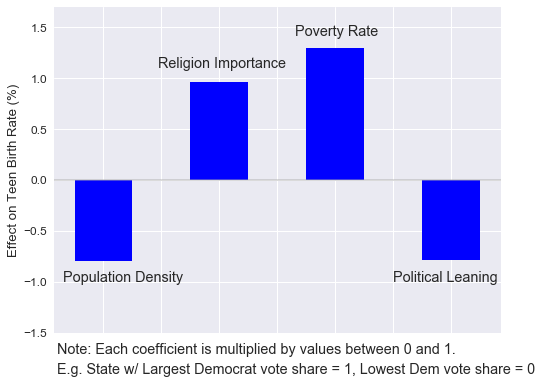

In [43]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

m_list = m_final.tolist()

ax.bar(range(len(m_list)), m_list, 0.5,  color='blue',)

ax.set_ylim(-1.5, 1.7)
plt.ylabel('Effect on Teen Birth Rate (%)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')

ax.axhline(0, c=(171/255, 171/255, 171/255), alpha=0.5)

ax.text(-.35, -1, 'Population Density')
ax.text(0.47, 1.1, 'Religion Importance')
ax.text(1.65, 1.42, 'Poverty Rate')
ax.text(2.5, -1.0, 'Political Leaning')
ax.text(-.4, -1.7, 'Note: Each coefficient is multiplied by values between 0 and 1.')
ax.text(-.4, -1.9, 'E.g. State w/ Largest Democrat vote share = 1, Lowest Dem vote share = 0')

fig.savefig("teen birth rate.pdf")
plt.show()

# Model Findings in order of importance
After starting with nearly 50 different explanatory variables, the final model can explain 81% of the variance in teen birth rates with only four variables: the importance of religion in the state, the state's poverty rate, the population density of the state, and the political leanings of the state. The variables affecting teen birth rate include:

- Poverty: teen birth rate goes UP as poverty rate goes UP.
- Religion: teen birth rate goes UP as religiosity goes UP. 
- Population Density: teen birth rate goes DOWN as population density goes UP.
- Political Leanings: teen birth rate goes DOWN as state's net vote share leans Democratic.

# Preparing data to create interactive maps

In [37]:
data_model_reduced['religion rank'] = data_model_reduced['religion_score'].rank(ascending=False).astype(int)
data_model_reduced['density rank'] = data_model_reduced['Population Density'].rank(ascending=False).astype(int)
data_model_reduced['birth rank'] = data_model_reduced['Teen birth rate (15-19 year olds)'].rank(ascending=False).astype(int)
data_model_reduced['poverty rank'] = data_model_reduced['Poverty Rate'].rank(ascending=False).astype(int)
data_model_reduced['Democratic vote rank'] = data_model_reduced['political_score'].rank(ascending=False).astype(int)
data_model_reduced.iloc[:5,-5:]

,religion rank,density rank,birth rank,poverty rank,Democratic vote rank
0,1,27,10,4,46
1,42,50,17,43,39
2,32,33,12,9,32
3,6,34,1,6,45
4,39,11,30,16,7


In [38]:
import plotly.plotly as py
import plotly 

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

scl = [[0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_model_reduced['text'] = 'Birth Rate Rank #' + data_model_reduced['birth rank'].astype(str)+ '<br>' + '<br>'+\
    'Religion Rank #'+ data_model_reduced['religion rank'].astype(str) + '<br>'+\
    'Poverty Rate Rank #'+ data_model_reduced['poverty rank'].astype(str) + '<br>'+\
    'Population Density Rank #'+ data_model_reduced['density rank'].astype(str) + '<br>'+\
    'Democratic vote share #'+ data_model_reduced['Democratic vote rank'].astype(str) 

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = data_model_reduced.loc[:,'Teen birth rate (15-19 year olds)'],
        locationmode = 'USA-states',
        text = data_model_reduced['text'],
        hoverinfo = 'skip+text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Teen Birth Rate (%)"
        )
    ) ]

layout = dict(
        title = 'Teen Birth Rate',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot(fig, filename='teen birth map' )

In [39]:
scl = [[0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_model_reduced['text'] = 'Birth Rate Rank #' + data_model_reduced['birth rank'].astype(str)+ '<br>' + '<br>'+\
    'Religion Rank #'+ data_model_reduced['religion rank'].astype(str) + '<br>'+\
    'Poverty Rate Rank #'+ data_model_reduced['poverty rank'].astype(str) + '<br>'+\
    'Population Density Rank #'+ data_model_reduced['density rank'].astype(str) + '<br>'+\
    'Democratic vote share #'+ data_model_reduced['Democratic vote rank'].astype(str) 
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = data_model_reduced.loc[:,'religion_score'],
        locationmode = 'USA-states',
        text = data_model_reduced['text'],
        hoverinfo = 'skip+text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Religion Score"
        )
    ) ]

layout = dict(
        title = 'Religiosity by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

py.iplot( fig, filename='religion importance map' )

In [40]:
import plotly.plotly as py
import plotly 

scl = [[0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_model_reduced['text'] = 'Birth Rate Rank #' + data_model_reduced['birth rank'].astype(str)+ '<br>' + '<br>'+\
    'Religion Rank #'+ data_model_reduced['religion rank'].astype(str) + '<br>'+\
    'Poverty Rate Rank #'+ data_model_reduced['poverty rank'].astype(str) + '<br>'+\
    'Population Density Rank #'+ data_model_reduced['density rank'].astype(str) + '<br>'+\
    'Democratic vote share #'+ data_model_reduced['Democratic vote rank'].astype(str) 

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = data_model_reduced.loc[:,'Poverty Rate'],
        locationmode = 'USA-states',
        text = data_model_reduced['text'],
        hoverinfo = 'skip+text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Poverty Rate (%)"
        )
    ) ]

layout = dict(
        title = 'Poverty Rate by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

py.iplot( fig, filename='poverty rate map' )

In [41]:
import plotly.plotly as py
import plotly 

scl = [[0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_model_reduced['text'] = 'Birth Rate Rank #' + data_model_reduced['birth rank'].astype(str)+ '<br>' + '<br>'+\
    'Religion Rank #'+ data_model_reduced['religion rank'].astype(str) + '<br>'+\
    'Poverty Rate Rank #'+ data_model_reduced['poverty rank'].astype(str) + '<br>'+\
    'Population Density Rank #'+ data_model_reduced['density rank'].astype(str) + '<br>'+\
    'Democratic vote share #'+ data_model_reduced['Democratic vote rank'].astype(str) 

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = data_model_reduced.loc[:,'Population Density'],
        locationmode = 'USA-states',
        text = data_model_reduced['text'],
        hoverinfo = 'skip+text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Population Density"
        )
    ) ]

layout = dict(
        title = 'Population Density by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

py.iplot( fig, filename='population density map' )

In [42]:
import plotly.plotly as py
import plotly 

scl = [[0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data_model_reduced['text'] = 'Birth Rate Rank #' + data_model_reduced['birth rank'].astype(str)+ '<br>' + '<br>'+\
    'Religion Rank #'+ data_model_reduced['religion rank'].astype(str) + '<br>'+\
    'Poverty Rate Rank #'+ data_model_reduced['poverty rank'].astype(str) + '<br>'+\
    'Population Density Rank #'+ data_model_reduced['density rank'].astype(str) + '<br>'+\
    'Democratic vote share #'+ data_model_reduced['Democratic vote rank'].astype(str) 

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = data_model_reduced.loc[:,'political_score'],
        locationmode = 'USA-states',
        text = data_model_reduced['text'],
        hoverinfo = 'skip+text',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Net % vote for Democrats"
        )
    ) ]

layout = dict(
        title = 'Democratic Vote Share by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

py.iplot( fig, filename='political map' )